In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pickle
import scan
import simulate_data
import h5py
import sys
np.set_printoptions(threshold=sys.maxsize)


In [41]:
def get_imgs(N, pattern_template):
    if len(pattern_template) == 0:
        print('FAIL')
        return pattern_template, None
    
    win_size = (N,1+max([max(k[:,0]) for k in pattern_template]))
    pattern_img = np.zeros((len(pattern_template),*win_size))
    for p,pattern in enumerate(pattern_template):
        for (i,j) in pattern:
            pattern_img[p,j,i] = 1
            
    pattern_img = pattern_img.transpose((1,2,0))
    
    return pattern_template, pattern_img

In [3]:
f = h5py.File(r'C:/Users/miles/Projects/datasets/heidelberg/shd_train.h5')

In [18]:
np.array(f['extra']['speaker'])[(np.array(f['labels'])==0)]

array([ 3,  7,  7,  6,  1,  9,  6, 10,  3,  8,  0,  8,  9, 11,  2,  9,  9,
        9,  7,  0,  9,  8,  0,  7,  7,  2,  2,  7, 10, 11,  0, 10,  1,  2,
        0,  9, 10,  0, 11,  2,  0,  1,  7,  1,  2,  6,  0, 11,  0,  9, 10,
        3, 10,  0,  1,  0,  6,  8,  9,  9, 11,  1,  1,  6,  0,  2, 10,  8,
       11,  9,  9,  7,  1,  7,  8,  1,  6,  7,  6,  2,  6,  2,  0,  3,  6,
       10,  9,  0,  2,  8, 11,  0,  2,  2,  2,  1,  8,  8,  7, 11, 10,  7,
        1,  9,  0,  2, 11, 10,  3,  3,  3, 10,  1, 11,  6,  7, 10, 10,  2,
        9,  8,  7,  6,  6,  7,  8, 11,  0, 11,  2, 11,  2,  3,  7,  2,  3,
        3,  2,  6,  0,  8,  2,  8, 10,  1,  2,  8, 11, 10,  9, 11,  0,  8,
        8,  9,  7,  0,  6,  7, 10,  1, 11,  3,  8,  3,  2,  1,  2,  0, 10,
        1,  3,  2,  9,  7,  3,  2,  2, 10,  7,  1,  9,  0,  9, 11, 10,  8,
        9,  1,  7,  1,  7,  6,  2, 10,  3,  3, 10,  1, 10, 11, 10,  0,  8,
        6,  8,  0,  1,  9,  8,  8,  0,  0, 11,  0,  6,  7, 10,  9,  2, 10,
        7, 11,  6,  0,  0

In [23]:
np.array(f['labels'])

array([11, 13,  5, 10,  1, 13,  4, 14,  6,  0, 11, 17,  5,  9, 12, 12,  5,
        0, 14,  5,  9,  5, 15, 15, 19, 12,  0, 14, 19,  9,  1, 11, 12, 16,
        0, 16, 11, 15, 13, 12,  2, 14,  6, 17,  9,  3,  4,  4,  3, 11, 15,
        1,  3, 12,  1,  5,  9,  1,  6, 11, 19,  1,  7,  6, 14,  1,  0,  6,
       10, 17, 11,  1, 13,  8, 13,  2, 19,  6, 19,  9,  8,  2, 18,  7,  4,
        7,  2,  3, 13,  9, 14, 18,  2,  1, 14,  0, 19,  9, 15,  6, 13, 19,
       12,  0, 19,  5, 11, 14,  3, 16, 18, 17, 14, 14, 19,  3, 11,  9, 17,
        0,  1,  8,  0,  7, 10,  2,  7, 13,  0, 14, 17, 19, 11,  1, 17, 12,
       16,  2,  0, 11, 18,  9, 14, 14, 19, 10, 15, 16, 15,  5, 12,  7, 10,
        5,  4, 15,  0, 16, 17,  0,  2,  4, 15,  9,  2,  4, 10, 14,  3, 18,
       11, 10, 13,  3,  5,  9,  7, 18,  6, 11, 11,  4,  1,  7, 10,  7,  2,
       17, 10, 17, 17,  4, 13, 19, 12,  4,  6,  4,  6, 13,  0,  7,  1, 15,
        2,  1,  9, 15,  8,  4, 14,  5, 15, 15,  1, 18, 10, 14,  4, 14,  1,
        4,  4, 16, 17, 13

In [24]:
idc

array([ 9, 17, 26, 34, 66], dtype=int64)

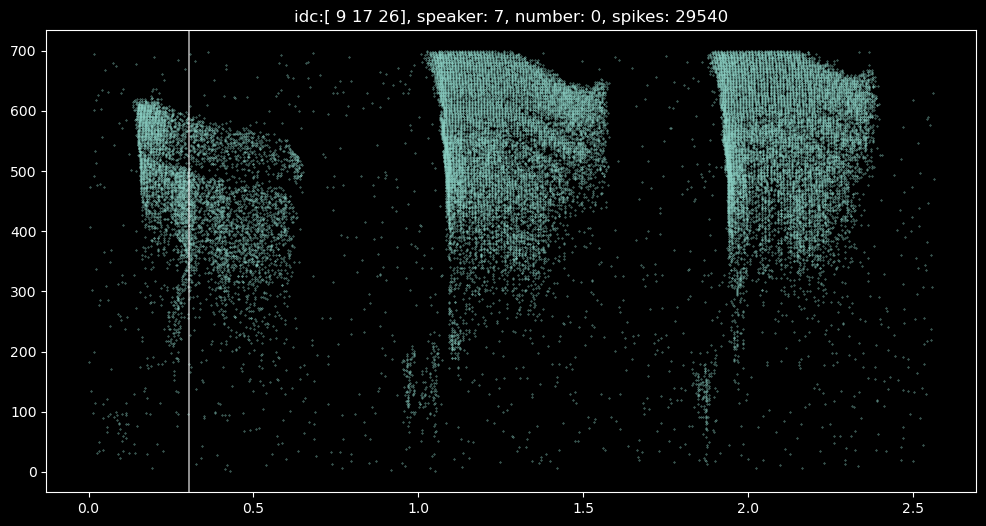

In [39]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))

idc = np.where((np.array(f['labels'])==0))[0][:3]

D=5/1000
times = np.array([0])
units = np.array([])
for i in idc:
    times = np.hstack((times, np.max(times)+f['spikes']['times'][i]))
    units = np.hstack((units, f['spikes']['units'][i]))
speaker = f['extra']['speaker'][i]
number = f['labels'][i]
units = units.astype('int')
times = np.delete(times,0)
plt.scatter(times ,units,s=0.1,alpha=0.9)
plt.axvline(0.3,linewidth=0.4)
plt.axvline(0.3+D,linewidth=0.4)

plt.title(f'idc:{idc}, speaker: {speaker}, number: {number}, spikes: {len(times)}')
plt.show()

In [40]:
# Convert the data into something that is easily readable by my parameter scan algo.
filename = f'combined-{idc}-{int(D*1000)}'

if not os.path.isfile(''.join((os.getcwd(),f'\\{filename}.pkl'))):
    pattern_template, sublist_keys_filt, window_time, cluster_time, sequence_time = scan.scan_raster((times*1000).astype('int'), units.astype('int'),window_dim=int(D*1000))
    print(f'run_time: {window_time+cluster_time+sequence_time} s')

    results_scan = {
        'pattern_template':pattern_template,
        'sublist_keys_filt':sublist_keys_filt,
        'window_time':window_time,
        'cluster_time':cluster_time,
        'sequence_time':sequence_time
    }

    import pickle 
    with open(f'{filename}.pkl', 'wb') as file:  # open a text file
        pickle.dump(results_scan, file) # serialize the list
    file.close()
else:
    with open(f'{filename}.pkl', 'rb') as file:
        results_scan = pickle.load(file)
    file.close()
    print(f'{filename}.pkl loaded!')

    

29529 Windows
400 patterns found..... 100%10.01 | opt_cutoff - 1.37 | most_detections - 10tections - 10
run_time: 226.22685074806213 s


NameError: name 'get_imgs' is not defined

In [50]:
pattern_template_copy, pattern_img = get_imgs(1+max(units.astype('int')),pattern_template)

raster = np.zeros((max((times*1000).astype('int'))+1, 1+max(units)))
print(raster.shape, pattern_img.shape)
for i in range(len(times)):
    raster[int(times[i]*1000),units[i]-1]=1
print('done')

D_ = pattern_img.shape[1]
sanity_check = np.zeros((raster.shape[0],pattern_img.shape[2]))
for j in tqdm(range(pattern_img.shape[2])):
    for i in range(raster.shape[0]-D_):
        sanity_check[i,j] = np.sum(pattern_img[...,j]*raster.T[:,i:i+D_])
    sanity_check[:,j] = sanity_check[:,j]/np.max(sanity_check[:,j])

(2565, 700) (700, 19, 400)
done


100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:30<00:00, 13.00it/s]


In [53]:
counts = np.array([list(np.where(sanity_check==1)[1]).count(k) for k in np.unique(np.where(sanity_check==1)[1])])
patterns = np.unique(np.where(sanity_check==1)[1])
pattern_template = np.array(pattern_template,dtype='object')
np.array(patterns[counts>2]), np.array(counts[counts>2]), np.array([len(k) for k in pattern_template[patterns[counts>2]]])

(array([  1,   2,   4,   5,   7,  11,  12,  17,  19,  20,  24,  26,  29,
         30,  33,  34,  35,  37,  38,  41,  42,  43,  49,  50,  52,  55,
         56,  62,  64,  68,  69,  74,  75,  76,  78,  80,  81,  82,  86,
         88,  94,  97, 107, 109, 110, 114, 115, 116, 126, 133, 134, 139,
        143, 149, 153, 156, 162, 163, 164, 165, 171, 176, 179, 186, 187,
        189, 194, 211, 213, 214, 218, 220, 221, 227, 229, 232, 237, 238,
        242, 246, 247, 252, 253, 255, 259, 269, 276, 287, 288, 289, 293,
        301, 303, 307, 308, 316, 319, 327, 342, 356, 367, 368, 369, 371,
        372, 381, 383, 384, 385, 396, 399], dtype=int64),
 array([ 84,   3,   6,   4, 119,   5,  19,  22,  16,   3,   6,   7, 143,
          3,   4,  99,   5,  10,   7,   3,   3,   3,   3,   5,   3,   3,
          5,  19,   4,   8,   3,   8,   5,   3,   3,  15,  12,   7,  16,
          5,   3,   6,   3,   3,   3,  68,   7,   5,   3,   5,   3,   3,
          4,   5,  24,   5,  14,   7,   5,   4,   3,   3,   3,   3

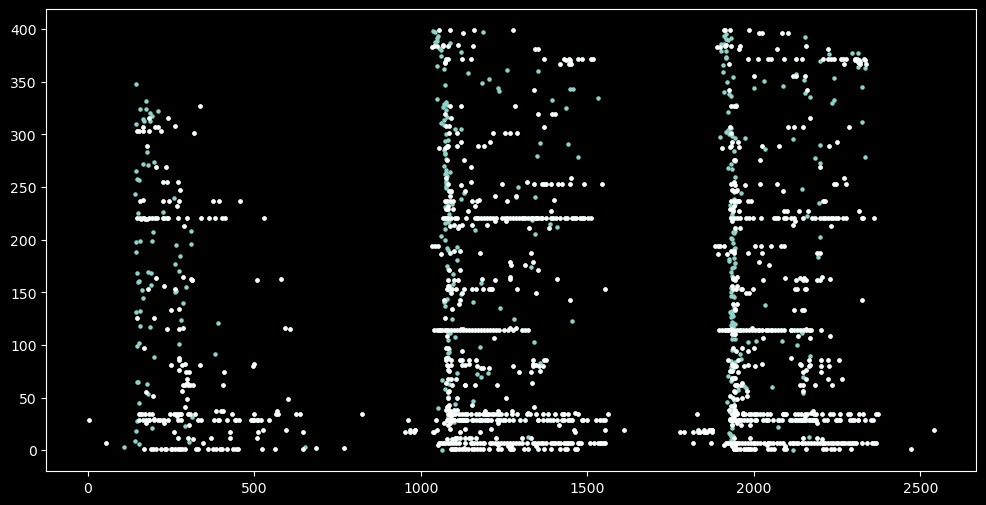

In [54]:
plt.figure(figsize=(12,6))
plt.scatter(*np.where(sanity_check==1), s=5)
y,x = patterns[counts>2][np.where(sanity_check[:,patterns[counts>2]]==1)[1]], np.where(sanity_check[:,patterns[counts>2]]==1)[0]
plt.scatter(x,y, c='white',s=5)
plt.show()

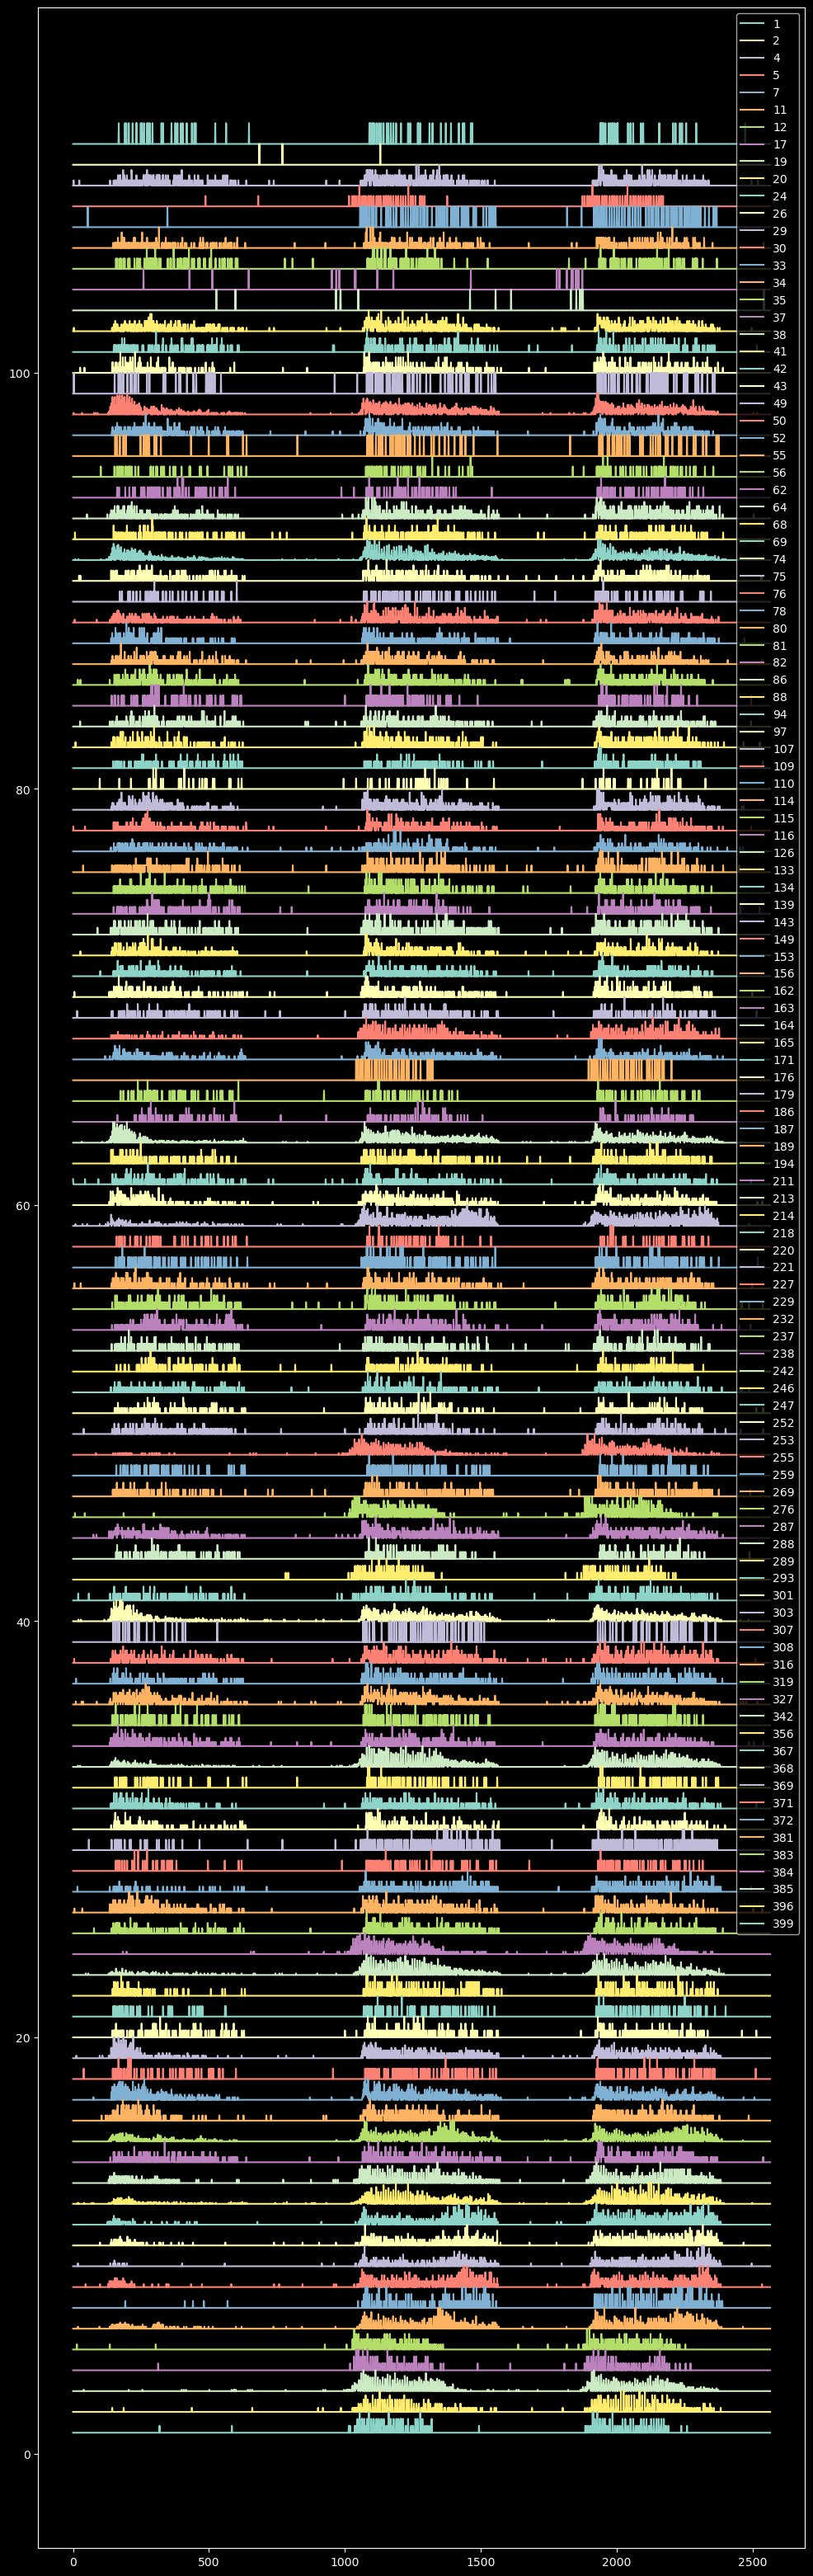

In [66]:
plt.figure(figsize=(12,40))
for i,k in enumerate(patterns[counts>2]):
    plt.plot(sanity_check[:,k]+len(patterns[counts>2])-i,label=k)
    plt.legend()
plt.show()

# Let's see what happens when we convolve these patterns on spoken digits for which it wasn't trained

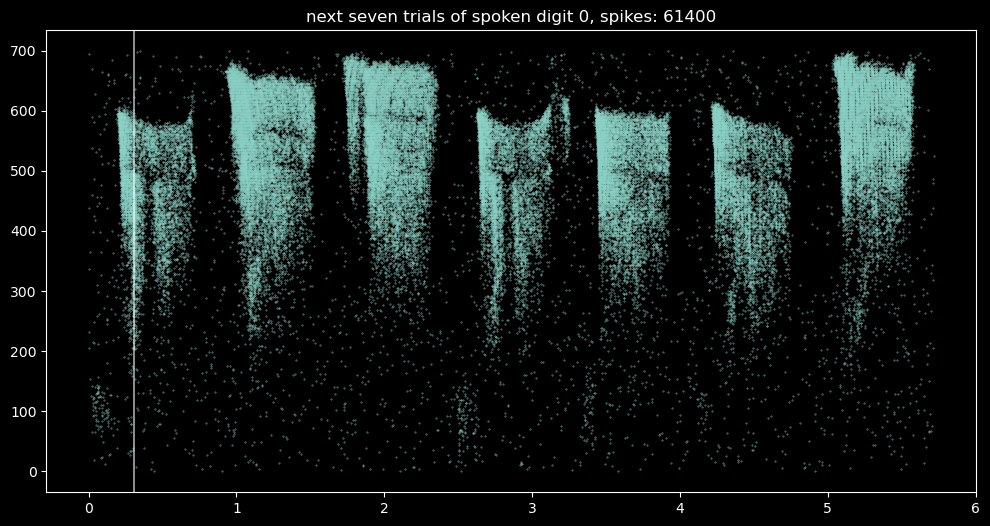

In [65]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))

idc = np.where((np.array(f['labels'])==0))[0][3:10]

D=5/1000
times = np.array([0])
units = np.array([])
for i in idc:
    times = np.hstack((times, np.max(times)+f['spikes']['times'][i]))
    units = np.hstack((units, f['spikes']['units'][i]))
speaker = f['extra']['speaker'][i]
number = f['labels'][i]
units = units.astype('int')
times = np.delete(times,0)
plt.scatter(times ,units,s=0.1,alpha=0.9)
plt.axvline(0.3,linewidth=0.4)
plt.axvline(0.3+D,linewidth=0.4)

# plt.title(f'idc:{idc}, speaker: {speaker}, number: {number}, spikes: {len(times)}')
plt.title(f'next seven trials of spoken digit 0, spikes: {len(times)}')

plt.show()

In [67]:
raster = np.zeros((max((times*1000).astype('int'))+1, 1+max(units)))
print(raster.shape, pattern_img.shape)
for i in range(len(times)):
    raster[int(times[i]*1000),units[i]-1]=1
print('done')

D_ = pattern_img.shape[1]
sanity_check = np.zeros((raster.shape[0],pattern_img.shape[2]))
for j in tqdm(range(pattern_img.shape[2])):
    for i in range(raster.shape[0]-D_):
        sanity_check[i,j] = np.sum(pattern_img[...,j]*raster.T[:,i:i+D_])
    sanity_check[:,j] = sanity_check[:,j]/np.max(sanity_check[:,j])

(5719, 700) (700, 19, 400)
done


100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [01:09<00:00,  5.74it/s]


In [68]:
counts = np.array([list(np.where(sanity_check==1)[1]).count(k) for k in np.unique(np.where(sanity_check==1)[1])])
patterns = np.unique(np.where(sanity_check==1)[1])
pattern_template = np.array(pattern_template,dtype='object')
np.array(patterns[counts>=2]), np.array(counts[counts>=2]), np.array([len(k) for k in pattern_template[patterns[counts>=2]]])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  13,  16,  17,  19,
         20,  23,  24,  26,  29,  30,  32,  33,  34,  35,  37,  40,  44,
         45,  47,  48,  49,  52,  55,  56,  57,  58,  59,  62,  63,  64,
         69,  70,  72,  73,  77,  82,  83,  84,  89,  91,  95,  96,  98,
        100, 101, 103, 105, 110, 111, 113, 114, 115, 118, 121, 122, 123,
        124, 125, 126, 129, 133, 135, 136, 139, 143, 146, 149, 153, 155,
        159, 161, 162, 164, 165, 167, 170, 171, 172, 174, 176, 179, 181,
        183, 184, 185, 186, 187, 189, 192, 193, 194, 197, 199, 201, 203,
        208, 209, 211, 213, 214, 218, 219, 221, 222, 223, 224, 227, 229,
        231, 232, 234, 239, 241, 242, 246, 247, 252, 253, 254, 255, 256,
        258, 262, 265, 266, 269, 274, 275, 276, 278, 281, 283, 289, 293,
        296, 297, 299, 303, 305, 310, 311, 315, 317, 319, 320, 322, 323,
        327, 334, 335, 336, 337, 338, 341, 342, 344, 345, 346, 347, 349,
        350, 351, 353, 354, 357, 358, 361, 362, 363

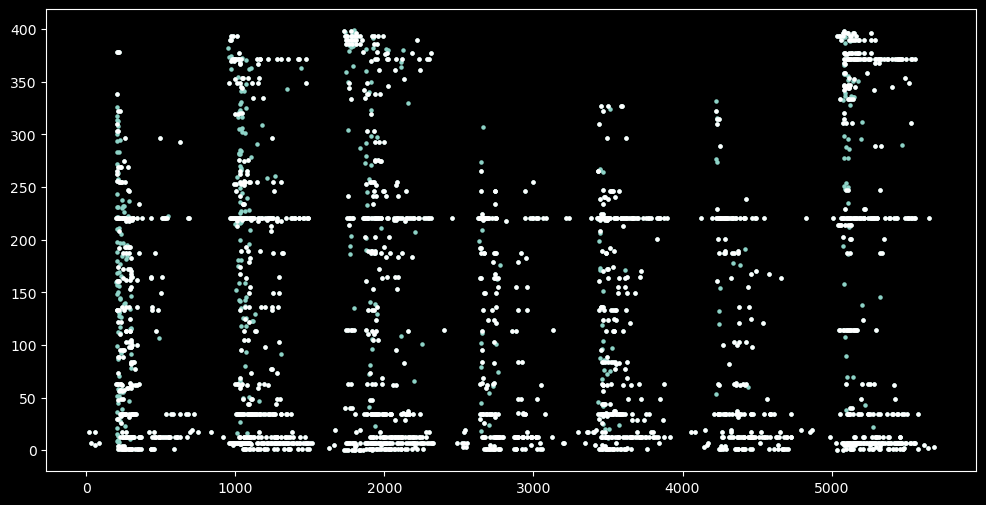

In [69]:
plt.figure(figsize=(12,6))
plt.scatter(*np.where(sanity_check==1), s=5)
y,x = patterns[counts>=2][np.where(sanity_check[:,patterns[counts>=2]]==1)[1]], np.where(sanity_check[:,patterns[counts>=2]]==1)[0]
plt.scatter(x,y, c='white',s=5)
plt.show()

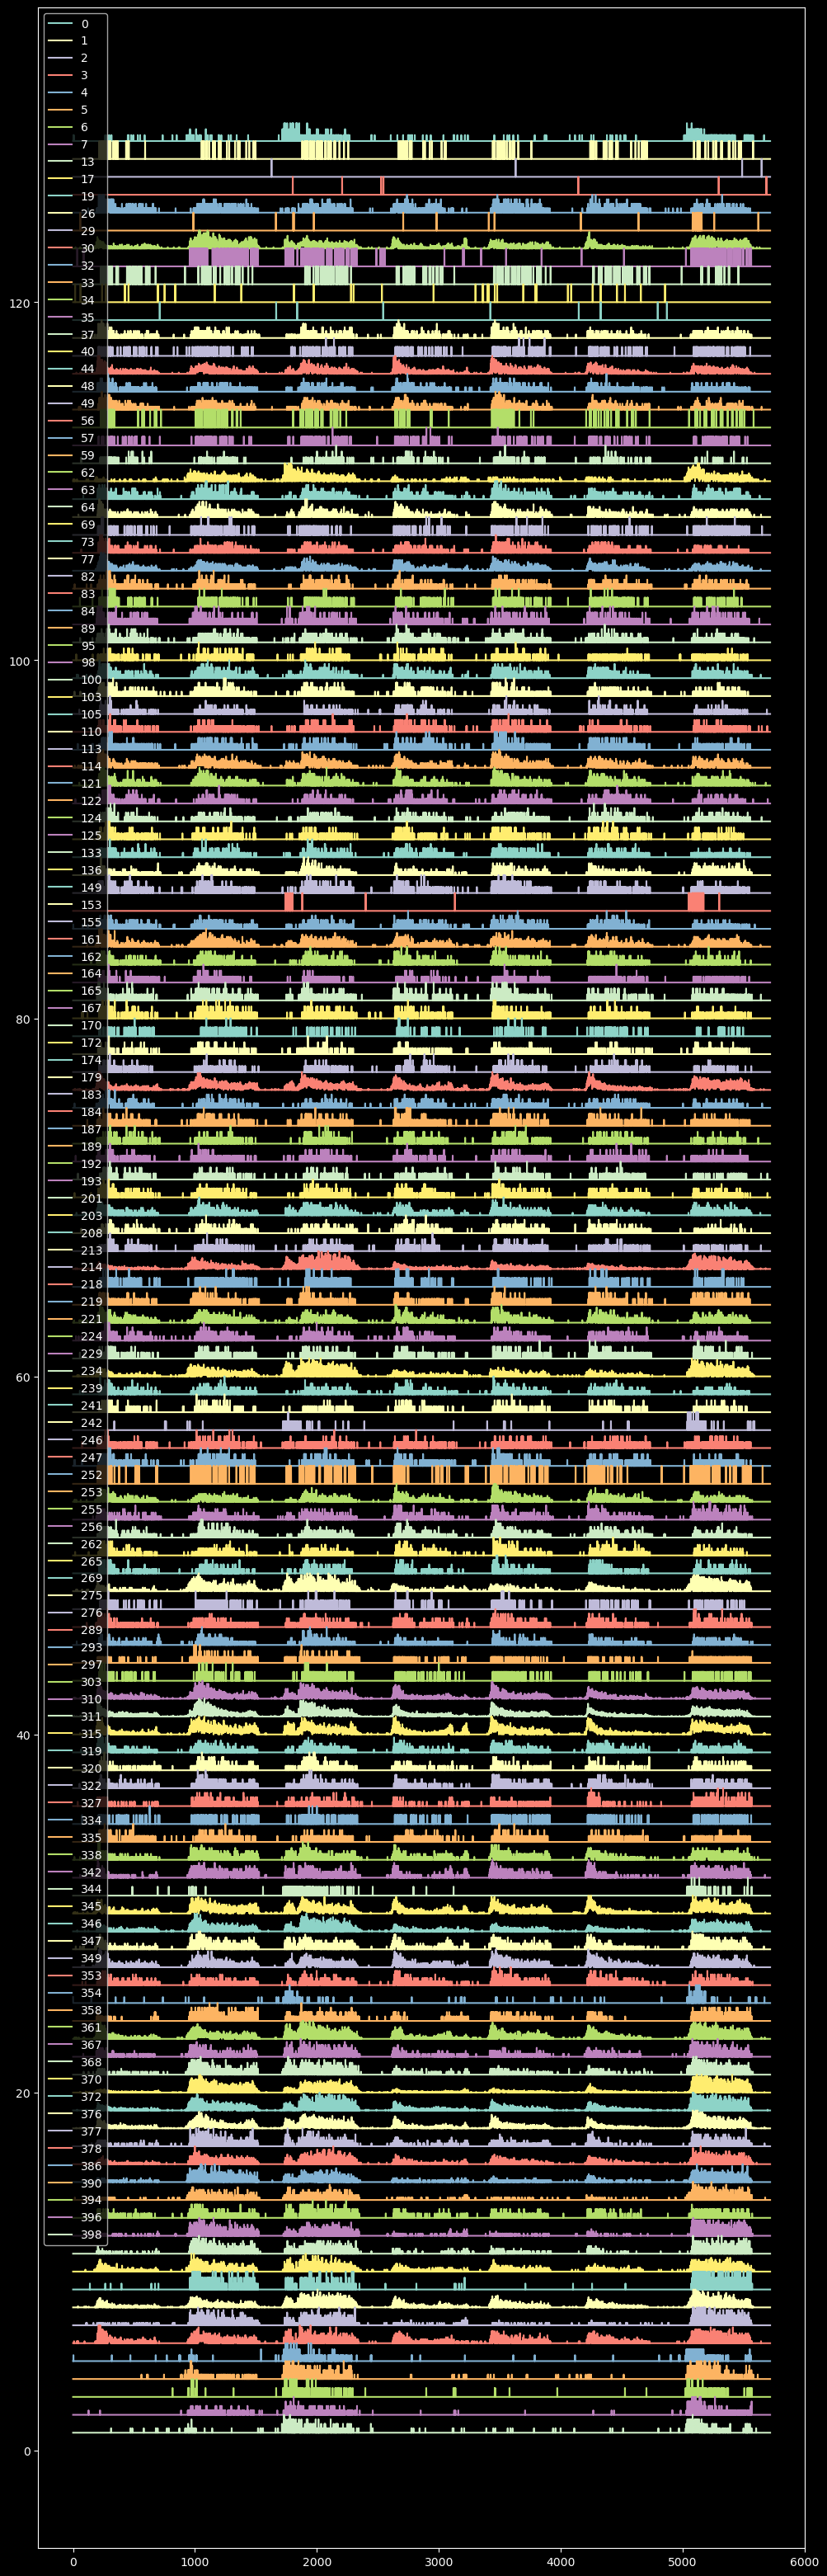

In [70]:
plt.figure(figsize=(12,40))
for i,k in enumerate(patterns[counts>=2]):
    plt.plot(sanity_check[:,k]+len(patterns[counts>=2])-i,label=k)
    plt.legend()
plt.show()

# Now let's look at spoken digits that are NOT 0

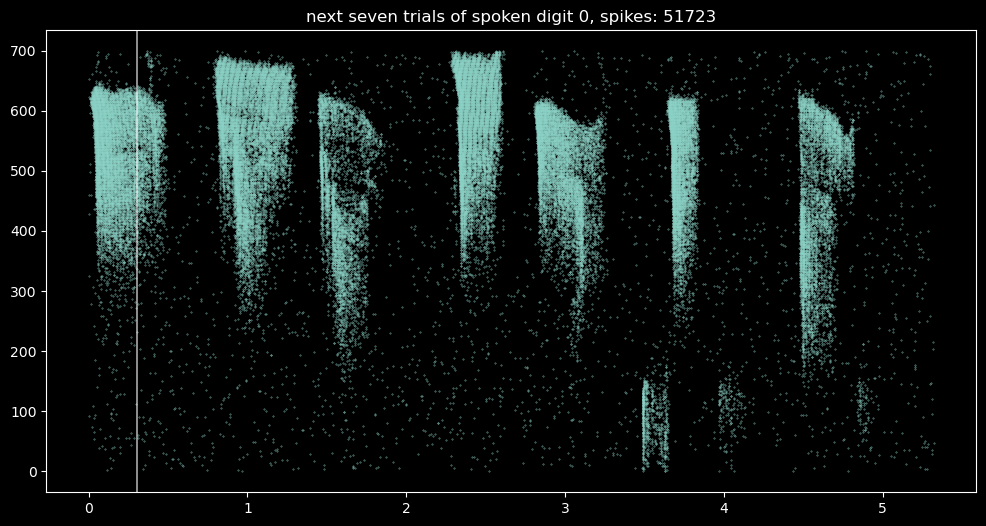

In [71]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))

idc = np.where((np.array(f['labels'])!=0))[0][3:10]

D=5/1000
times = np.array([0])
units = np.array([])
for i in idc:
    times = np.hstack((times, np.max(times)+f['spikes']['times'][i]))
    units = np.hstack((units, f['spikes']['units'][i]))
speaker = f['extra']['speaker'][i]
number = f['labels'][i]
units = units.astype('int')
times = np.delete(times,0)
plt.scatter(times ,units,s=0.1,alpha=0.9)
plt.axvline(0.3,linewidth=0.4)
plt.axvline(0.3+D,linewidth=0.4)

# plt.title(f'idc:{idc}, speaker: {speaker}, number: {number}, spikes: {len(times)}')
plt.title(f'next seven trials of spoken digit 0, spikes: {len(times)}')

plt.show()

In [72]:
raster = np.zeros((max((times*1000).astype('int'))+1, 1+max(units)))
print(raster.shape, pattern_img.shape)
for i in range(len(times)):
    raster[int(times[i]*1000),units[i]-1]=1
print('done')

D_ = pattern_img.shape[1]
sanity_check = np.zeros((raster.shape[0],pattern_img.shape[2]))
for j in tqdm(range(pattern_img.shape[2])):
    for i in range(raster.shape[0]-D_):
        sanity_check[i,j] = np.sum(pattern_img[...,j]*raster.T[:,i:i+D_])
    sanity_check[:,j] = sanity_check[:,j]/np.max(sanity_check[:,j])

(5325, 700) (700, 19, 400)
done


100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [01:13<00:00,  5.43it/s]


In [73]:
counts = np.array([list(np.where(sanity_check==1)[1]).count(k) for k in np.unique(np.where(sanity_check==1)[1])])
patterns = np.unique(np.where(sanity_check==1)[1])
pattern_template = np.array(pattern_template,dtype='object')
np.array(patterns[counts>=2]), np.array(counts[counts>=2]), np.array([len(k) for k in pattern_template[patterns[counts>=2]]])

(array([  0,   1,   2,   3,   5,   6,   7,   8,  11,  12,  17,  19,  21,
         23,  24,  26,  27,  29,  32,  33,  34,  37,  39,  41,  43,  49,
         52,  55,  60,  62,  64,  66,  68,  69,  71,  76,  77,  80,  82,
         83,  84,  85,  86,  87,  88,  89,  91,  94,  96,  98, 101, 103,
        104, 106, 107, 109, 111, 112, 113, 114, 115, 116, 117, 119, 120,
        127, 128, 130, 134, 139, 146, 147, 149, 150, 159, 161, 162, 163,
        164, 165, 167, 170, 172, 176, 178, 179, 181, 183, 185, 189, 191,
        192, 193, 195, 197, 204, 205, 207, 208, 213, 218, 219, 221, 223,
        227, 228, 229, 231, 237, 238, 239, 241, 242, 246, 252, 253, 255,
        259, 261, 263, 264, 266, 273, 275, 276, 280, 287, 288, 292, 293,
        297, 301, 303, 305, 307, 310, 311, 320, 323, 324, 327, 330, 335,
        340, 341, 343, 344, 349, 351, 353, 354, 356, 359, 361, 365, 366,
        367, 372, 378, 380, 382, 386, 388, 390, 392, 396, 397, 398, 399],
       dtype=int64),
 array([  5, 136,   5,  16,  

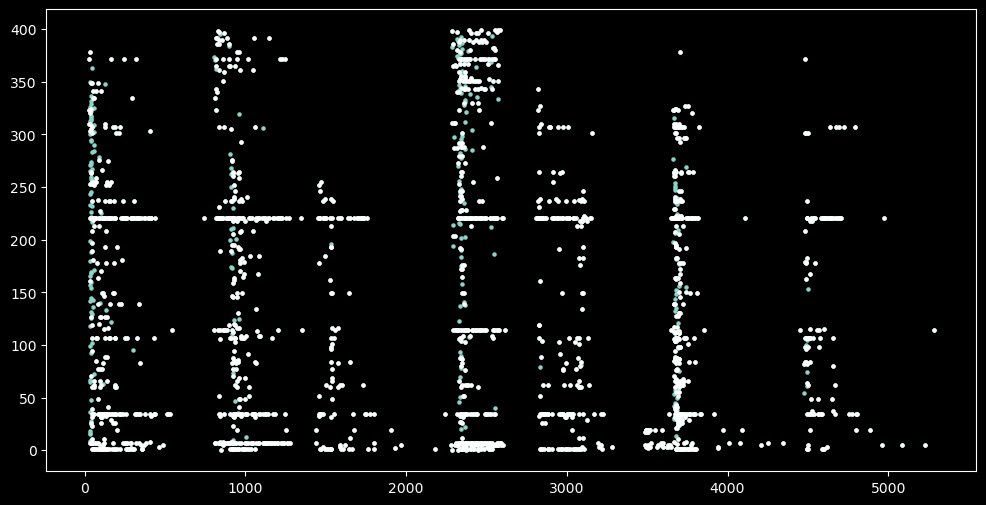

In [76]:
plt.figure(figsize=(12,6))
plt.scatter(*np.where(sanity_check==1), s=5)
y,x = patterns[counts>=2][np.where(sanity_check[:,patterns[counts>=2]]==1)[1]], np.where(sanity_check[:,patterns[counts>=2]]==1)[0]
plt.scatter(x,y, c='white',s=5)
plt.show()

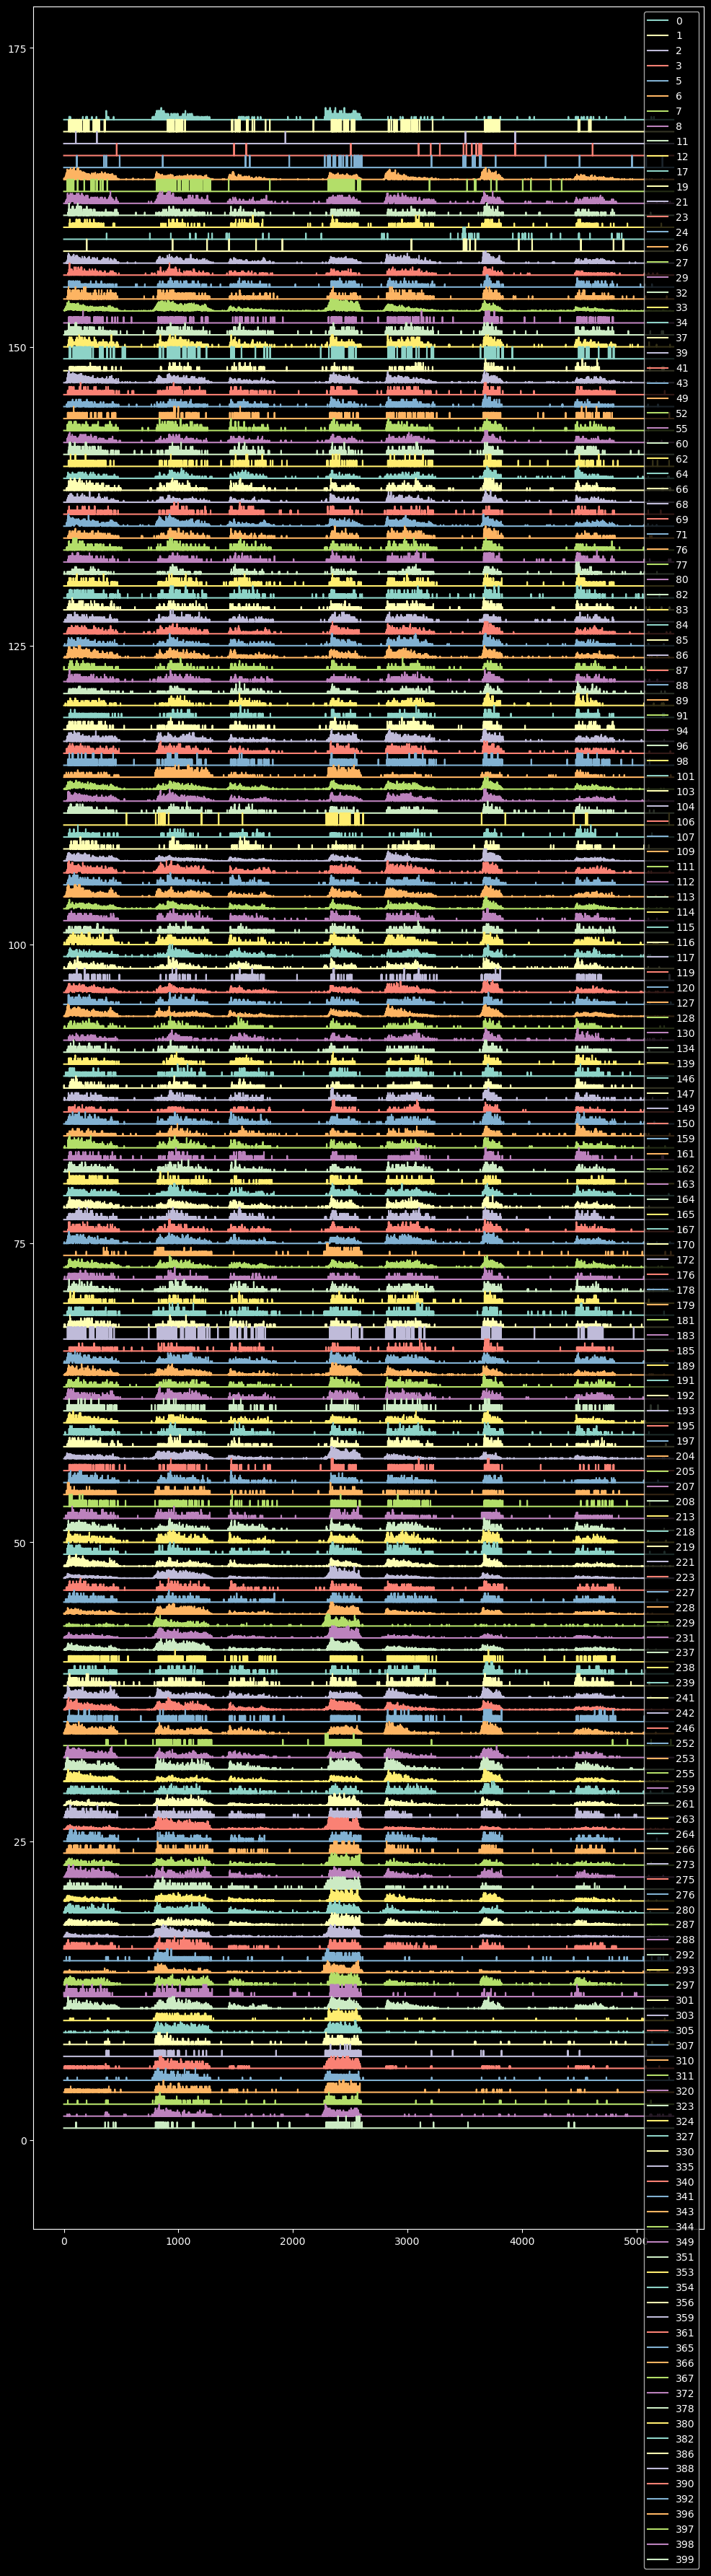

In [77]:
plt.figure(figsize=(12,40))
for i,k in enumerate(patterns[counts>=2]):
    plt.plot(sanity_check[:,k]+len(patterns[counts>=2])-i,label=k)
    plt.legend()
plt.show()